In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
def load_data():
    train_df = pd.read_csv('fashion-mnist_train.csv')
    test_df = pd.read_csv('fashion-mnist_test.csv')
    return train_df, test_df

In [9]:
train_df, test_df = load_data()

In [24]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
train_df = train_df.values
test_df = test_df.values

In [44]:
X = train_df[:, 1:].reshape(60000, 28, 28, 1)/255
y = train_df[:, 0].astype('int32')

In [47]:
K = len(set(y))

In [53]:
#One-Hot-Encoder
def y2indicator(y):
    N = len(y)
    K = len(set(y))
    I = np.zeros((N, K))
    I[np.arange(N), y] = 1
    return I

In [59]:
# create model
model = Sequential()

model.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(kernel_size=(3,3), filters=128, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
history = model.fit(X, y, validation_split=0.3, epochs=15, batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 49s 1ms/sample - loss: 0.5083 - accuracy: 0.8145 - val_loss: 0.4604 - val_accuracy: 0.8319
Epoch 2/15
42000/42000 [==============================] - 48s 1ms/sample - loss: 0.3567 - accuracy: 0.8676 - val_loss: 0.3634 - val_accuracy: 0.8672
Epoch 3/15
42000/42000 [==============================] - 48s 1ms/sample - loss: 0.3093 - accuracy: 0.8856 - val_loss: 0.3291 - val_accuracy: 0.8828
Epoch 4/15
42000/42000 [==============================] - 48s 1ms/sample - loss: 0.2739 - accuracy: 0.8964 - val_loss: 0.3346 - val_accuracy: 0.8807
Epoch 5/15
42000/42000 [==============================] - 51s 1ms/sample - loss: 0.2482 - accuracy: 0.9058 - val_loss: 0.3169 - val_accuracy: 0.8867
Epoch 6/15
42000/42000 [==============================] - 55s 1ms/sample - loss: 0.2243 - accuracy: 0.9155 - val_loss: 0.3469 - val_accuracy: 0.8881
Epoch 7/15
42000/42000 [==============================] 

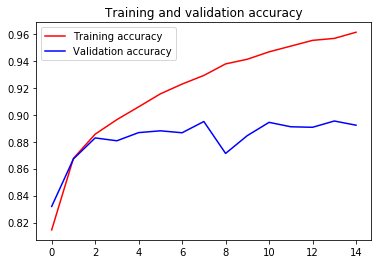

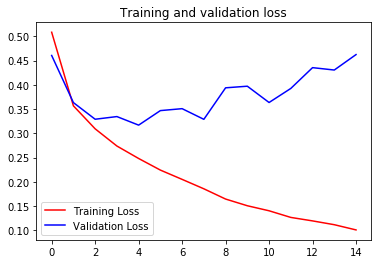

In [64]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [66]:
test_data = test_df[:, 1:].reshape(10000, 28, 28, 1)/255

In [69]:
submission = model.predict_classes(test_data)

In [70]:
submission

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)